<a href="https://colab.research.google.com/github/Tirthankar4/Kaggle/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = pd.read_csv("train.csv", index_col = "PassengerId")
X_test = pd.read_csv("test.csv", index_col = "PassengerId")

In [ ]:
  will_drop_cols = ["Name", "Ticket","Fare", "Cabin", "Embarked"]
  X = X.drop(will_drop_cols, axis=1)
  X_test = X_test.drop(will_drop_cols, axis=1)

In [ ]:
y = X.pop("Survived")

In [ ]:
from re import L
from sklearn.preprocessing import LabelEncoder

gender = LabelEncoder()
X['Sex'] = gender.fit_transform(X['Sex'])
X_test['Sex'] = gender.transform(X_test['Sex'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

known_age = X[X['Age'].notnull()]
unknown_age = X[X['Age'].isnull()]

X1 = known_age.drop('Age', axis=1)
y1 = known_age['Age']

rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rf.fit(X1, y1)

age_X = rf.predict(unknown_age.drop('Age', axis=1))

X.loc[(X['Age'].isnull()), 'Age'] = age_X
X_test['Age'] = rf.predict(X_test.drop('Age', axis=1))

In [ ]:
X.drop(["SibSp"], axis=1, inplace=True)
X_test.drop(["SibSp"], axis=1, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

param_grid = {
    'n_estimators':[69, 420, 696],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 9],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state = 69)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(X, y)

best_params = grid_search.best_params_

In [ ]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state = 69)
preds1 = best_model.predict(X_valid)
from sklearn.metrics import classification_report
print(classification_report(y_valid, preds1))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       112
           1       0.85      0.79      0.82        67

    accuracy                           0.87       179
   macro avg       0.87      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



In [ ]:
X_copy = pd.read_csv("train.csv", index_col = "PassengerId")
X_test_copy = pd.read_csv("test.csv", index_col = "PassengerId")

In [ ]:
X['FamilySize'] = X_copy['SibSp'] + X_copy['Parch'] + 1
X['IsAlone'] = (X['FamilySize'] == 1).astype(int)

X_test['FamilySize'] = X_test_copy['SibSp'] + X_test_copy['Parch'] + 1
X_test['IsAlone'] = (X_test['FamilySize'] == 1).astype(int)

In [ ]:
X.drop(["Title"], axis=1, inplace=True)
X_test.drop(["Title"], axis=1, inplace=True)

In [ ]:
best_model.fit(X, y)
predictions = best_model.predict(X_test)

In [ ]:
output = pd.DataFrame({"PassengerId": X_test.index, "Survived": predictions})
output.to_csv("submission.csv", index=False)

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=69),
             param_grid={'bootstrap': [True, False], 'max_depth': [4, 6, 9],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [69, 420, 696]},
             scoring='f1')

In [ ]:
best_params = grid_search.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 696}

In [ ]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

In [ ]:
best_model.fit(X, y)
predictions = best_model.predict(X_test)

In [ ]:
output = pd.DataFrame({"PassengerId": X_test.index, "Survived": predictions})
output.to_csv("submission.csv", index=False)

In [ ]:
best_model.feature_importances_

array([0.16245512, 0.39971722, 0.33326785, 0.08528578, 0.01927404])

In [ ]:
X_copy.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
X_copy[["Ticket_Text", "Ticket_Nos"]] = X_copy["Ticket"].str.extract(r'([A-Za-z./]*)\s*(\d+)$')

In [ ]:
X_test_copy[["Ticket_Text", "Ticket_Nos"]] = X_test_copy["Ticket"].str.extract(r'([A-Za-z./]*)\s*(\d+)$')

In [ ]:
X_copy.loc[X_copy["Ticket_Nos"].isna()].index

Index([180, 272, 303, 598], dtype='int64', name='PassengerId')

In [ ]:
X.drop([180, 272, 303, 598], axis=0, inplace=True)

In [ ]:
X_copy.drop([180, 272, 303, 598], axis=0, inplace=True)

In [ ]:
X_copy["Ticket_Nos"] = X_copy["Ticket_Nos"].astype(int)

In [ ]:
tick_nos = np.log(X_copy["Ticket_Nos"])

<Axes: xlabel='Pclass', ylabel='Ticket_Nos'>

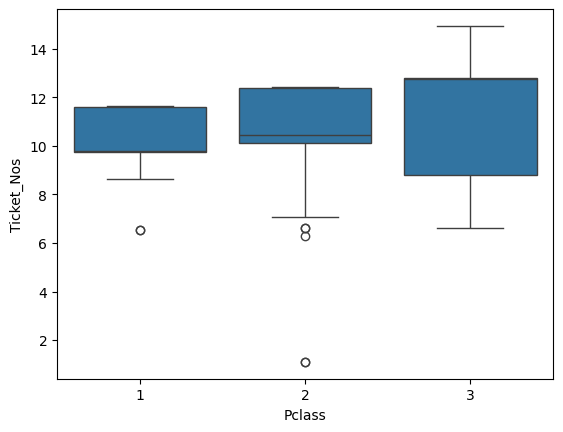

In [ ]:
sns.boxplot(x = X_copy["Pclass"], y = tick_nos)

<Axes: xlabel='Survived', ylabel='Ticket_Nos'>

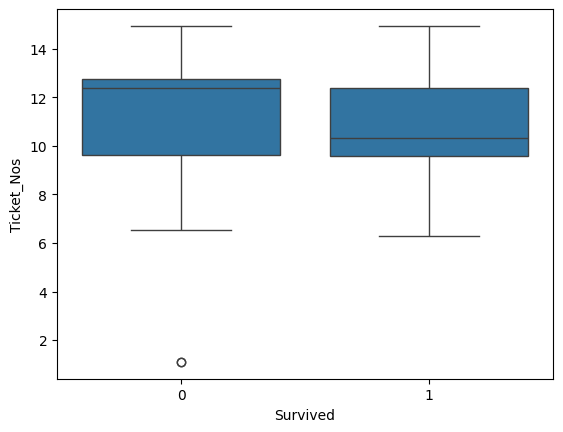

In [ ]:
sns.boxplot(x = X_copy["Survived"], y = tick_nos)

In [ ]:
X["Ticket_Nos"] = tick_nos

In [ ]:
X_test_copy["Ticket_Nos"] = X_test_copy["Ticket_Nos"].astype(int)
test_tick_nos = np.log(X_test_copy["Ticket_Nos"])
X_test["Ticket_Nos"] = test_tick_nos

In [ ]:
y.drop([180, 272, 303, 598], inplace = True)

In [ ]:
best_model.fit(X, y)
predictions = best_model.predict(X_test)

In [ ]:
output = pd.DataFrame({"PassengerId": X_test.index, "Survived": predictions})
output.to_csv("submission.csv", index=False)

In [ ]:
best_model.feature_importances_

array([0.11565737, 0.35746355, 0.19529622, 0.06870472, 0.01992126,
       0.24295688])

In [ ]:
X.drop(["IsAlone"], axis = 1, inplace = True)
X_test.drop(["IsAlone"], axis = 1, inplace = True)

In [ ]:
best_model.fit(X, y)
predictions = best_model.predict(X_test)
output = pd.DataFrame({"PassengerId": X_test.index, "Survived": predictions})
output.to_csv("submission.csv", index=False)

In [ ]:
best_model.feature_importances_

array([0.11802643, 0.36775622, 0.19555913, 0.08137515, 0.23728307])

In [ ]:
X["Fare"] = np.log(X_copy["Fare"] + 1)
X_test["Fare"] = np.log(X_test_copy["Fare"] + 1)

In [ ]:
X["IsAlone"] = (X['FamilySize'] == 1).astype(int)
X_test["IsAlone"] = (X_test['FamilySize'] == 1).astype(int)

In [ ]:
X_test.Fare.fillna(X_test.Fare.mean(), inplace = True)

In [ ]:
best_model.fit(X, y)
predictions = best_model.predict(X_test)
output = pd.DataFrame({"PassengerId": X_test.index, "Survived": predictions})
output.to_csv("submission.csv", index=False)

In [ ]:
best_model.feature_importances_

array([0.08701414, 0.33442657, 0.15448856, 0.0595087 , 0.17292057,
       0.17703037, 0.01461109])

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
age = SimpleImputer(strategy='median')
X['Age'] = age.fit_transform(X_copy[['Age']])
X_test['Age'] = age.transform(X_test_copy[['Age']])

In [ ]:
best_model.fit(X, y)
predictions = best_model.predict(X_test)
output = pd.DataFrame({"PassengerId": X_test.index, "Survived": predictions})
output.to_csv("submission.csv", index=False)

In [ ]:
best_model.feature_importances_

array([0.08868931, 0.34254823, 0.13876081, 0.06041653, 0.17747945,
       0.17779633, 0.01430934])

Summary of 26/06/24: ['Pclass', 'Sex', 'Age', 'FamilySize', 'Ticket_Nos', 'Fare', 'IsAlone'] are important.

Best way to preprocess each feature above:
Pclass: No preprocessing,
Sex: Simple Label Encoding,
Age: Null values to be predicted by RandomForestRegressor,
FamilySize: SibSp + Parch,
Ticket_Nos: Extract numerical part from Ticket then transform by log,
Fare: Take log of original Fares (in test set there's one row with null Fare; can be fit as per wish),
IsAlone: If FamilySize is 1 value 1 else 0

Features not yet considered: Cabin (very difficult to consider), Embarked, Name, Ticket_Text (very difficult to consider)